# Plotting with maps:

Cartopy is a good package for plotting with maps. 

In [6]:
import cartopy.crs as ccrs
import xarray as xr
import matplotlib.pyplot as plt

Open a netcdf file:

In [8]:
ds_noresm = xr.open_dataset('Data/CMIP.NCC.NorESM2-LM.historical.Amon.gn.nc')

Averge so that all that is left as coordinates is latitude and longitude (here we avg over time and member_id).

In [10]:
ds_noresm.load()

<xarray.Dataset> Size: 328MB
Dimensions:    (member_id: 3, time: 1980, lat: 96, lon: 144)
Coordinates:
  * member_id  (member_id) <U8 96B 'r1i1p1f1' 'r3i1p1f1' 'r2i1p1f1'
  * time       (time) datetime64[ns] 16kB 1850-01-16T12:00:00 ... 2014-12-16T...
  * lat        (lat) float64 768B -90.0 -88.11 -86.21 ... 86.21 88.11 90.0
  * lon        (lon) float64 1kB 0.0 2.5 5.0 7.5 ... 350.0 352.5 355.0 357.5
    height     float64 8B 2.0
Data variables:
    tas        (member_id, time, lat, lon) float32 328MB 245.2 245.0 ... 245.4
Attributes: (12/54)
    branch_time_in_parent:     441650.0
    mip_era:                   CMIP6
    external_variables:        areacella
    table_id:                  Amon
    history:                   2019-08-15T12:42:21Z ; CMOR rewrote data to be...
    product:                   model-output
    ...                        ...
    table_info:                Creation Date:(24 July 2019) MD5:0bb394a356ef9...
    grid_label:                gn
    branch_method:             Hybrid-restart from year 1631-01-01 of piControl
    realization_index:         2
    tracking_id:               hdl:21.14100/2486cf87-033c-4848-ab3e-e828c3b7c...
    intake_esm_dataset_key:    CMIP.NCC.NorESM2-LM.historical.Amon.gn

In [12]:
ds_noresm_mean = ds_noresm.mean(['time','member_id'])

We can now inspect the result easily by writing:

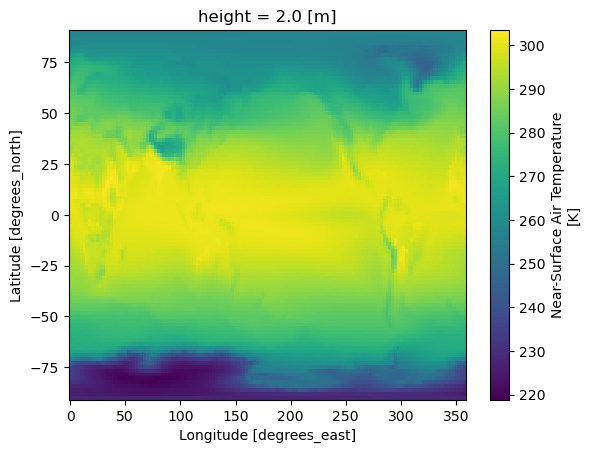

In [15]:
ds_noresm_mean['tas'].plot()

However this plot does not have map features. Let's add these. 
Below we are telling the plotting function that the data has a regular lat-lon grid (transform=PlateCarree) and then we are telling it to plot the data with Robinson projection: 

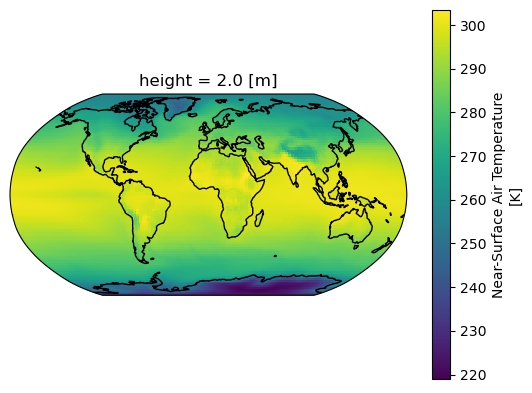

In [27]:
p = ds_noresm_mean['tas'].plot(
    subplot_kws=dict(projection=ccrs.Robinson()),
    transform=ccrs.PlateCarree(),
)
p.axes.set_global()
p.axes.coastlines()


Above we are also adding coastlines.

Below is an example with another projection:

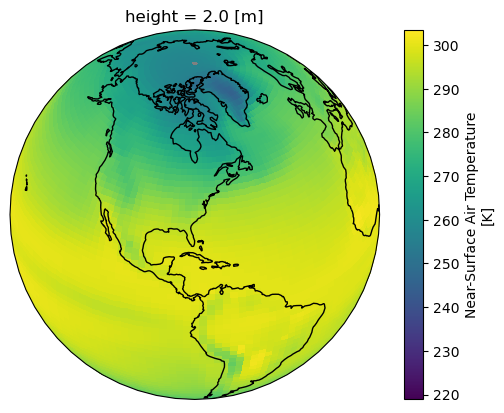

In [30]:
p = ds_noresm_mean['tas'].plot(
    subplot_kws=dict(projection=ccrs.Orthographic(-80, 35), 
                     facecolor="gray"),
    transform=ccrs.PlateCarree(),
)


p.axes.set_global()

p.axes.coastlines()
